In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
dataparse= lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
sbi=pd.read_csv('SBI.csv', parse_dates=['Date'],date_parser=dataparse)
sbi.head()

C:\Users\Nachiketh\AppData\Local\Temp\ipykernel_6656\2012283507.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,SBIN,252.5,253.65,242.6,243.60,244.80,25988990
1,2017-01-03,SBIN,244.0,246.40,241.1,244.90,244.54,15963085
2,2017-01-04,SBIN,245.8,246.40,242.2,242.90,243.96,11225978
3,2017-01-05,SBIN,245.0,245.90,243.7,245.35,244.94,11970913
4,2017-01-06,SBIN,246.0,249.00,245.5,245.90,247.10,12354302


In [3]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1487 non-null   datetime64[ns]
 1   Symbol     1487 non-null   object        
 2   Open       1487 non-null   float64       
 3   High       1487 non-null   float64       
 4   Low        1487 non-null   float64       
 5   Close      1487 non-null   float64       
 6   Adj Close  1487 non-null   float64       
 7   Volume     1487 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 93.1+ KB


In [4]:
print(f'Dataframe contains stock price between {sbi.Date.min()} {sbi.Date.max()}')
print(f'Total days={(sbi.Date.max()  - sbi.Date.min()).days}days')

Dataframe contains stock price between 2017-01-02 00:00:00 2022-12-30 00:00:00
Total days=2188days


In [5]:
sbi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1.487000e+03
mean,338.598924,342.965333,333.812878,338.257969,338.463436,2.983744e+07
std,108.745761,109.645521,107.973657,108.889191,108.867017,2.511632e+07
min,151.950000,153.200000,149.450000,150.850000,151.820000,2.171603e+06
25%,268.925000,272.025000,265.600000,269.000000,268.855000,1.384713e+07
50%,303.500000,307.450000,299.000000,302.850000,302.920000,2.067789e+07
75%,425.300000,429.700000,419.775000,424.650000,424.630000,3.780344e+07
max,625.550000,629.550000,617.500000,625.500000,623.520000,2.626771e+08


<AxesSubplot:>

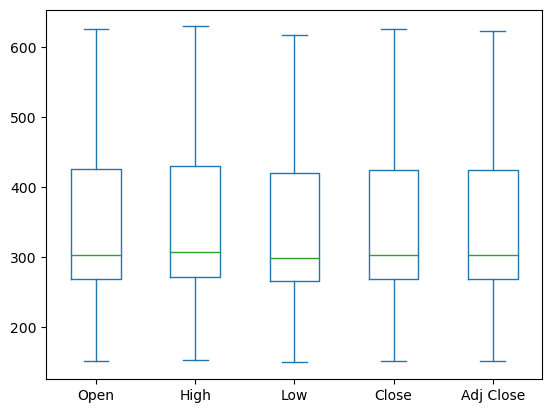

In [6]:
sbi[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [7]:
layout=go.Layout(
    title='Stock Price Of SBI',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    )
)
sbi_data=[{'x':sbi['Date'],'y':sbi['Close']}]
plot=go.Figure(data=sbi_data, layout=layout)

In [8]:
iplot(plot)

In [9]:
sbi.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,SBIN,252.5,253.65,242.6,243.60,244.80,25988990
1,2017-01-03,SBIN,244.0,246.40,241.1,244.90,244.54,15963085
2,2017-01-04,SBIN,245.8,246.40,242.2,242.90,243.96,11225978
3,2017-01-05,SBIN,245.0,245.90,243.7,245.35,244.94,11970913
4,2017-01-06,SBIN,246.0,249.00,245.5,245.90,247.10,12354302


In [10]:
#Building the regression model
from sklearn.model_selection import train_test_split
#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model evolution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
#split the data into train and test sets
X=np.array(sbi.index).reshape(-1,1)
Y=sbi['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [12]:
#feature scaling
scaler=StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [15]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = "markers",
    name = "Actual"
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
sbi_data = [trace0,trace1]
layout.xaxis.title.text = "Day"
plot2 = go.Figure(data=sbi_data, layout=layout)

In [16]:
iplot(plot2)

In [ ]:
#calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}

'''
print(scores)